### Support Vector Machines

This assignment will build off of the previous ungraded assignment. However, here you will use a radial basis function  for your kernel rather than a linear specification. 

To begin, a synthetic data set has been provided below. It is normally distributed with an added offset to create two separate classes.

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.4     ✔ recipes      1.0.5
✔ dials        1.1.0     ✔ rsample      1.1.1
✔ dplyr        1.1.0     ✔ tibble       3.2.0
✔ ggplot2      3.4.1     ✔ tidyr        1.3.0
✔ infer        1.0.4     ✔ tune         1.0.1
✔ modeldata    1.1.0     ✔ workflows    1.1.3
✔ parsnip      1.0.4     ✔ workflowsets 1.0.0
✔ purrr        1.0.1     ✔ yardstick    1.1.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Dig deeper into tidy modeling with R at https://www.tmwr.org



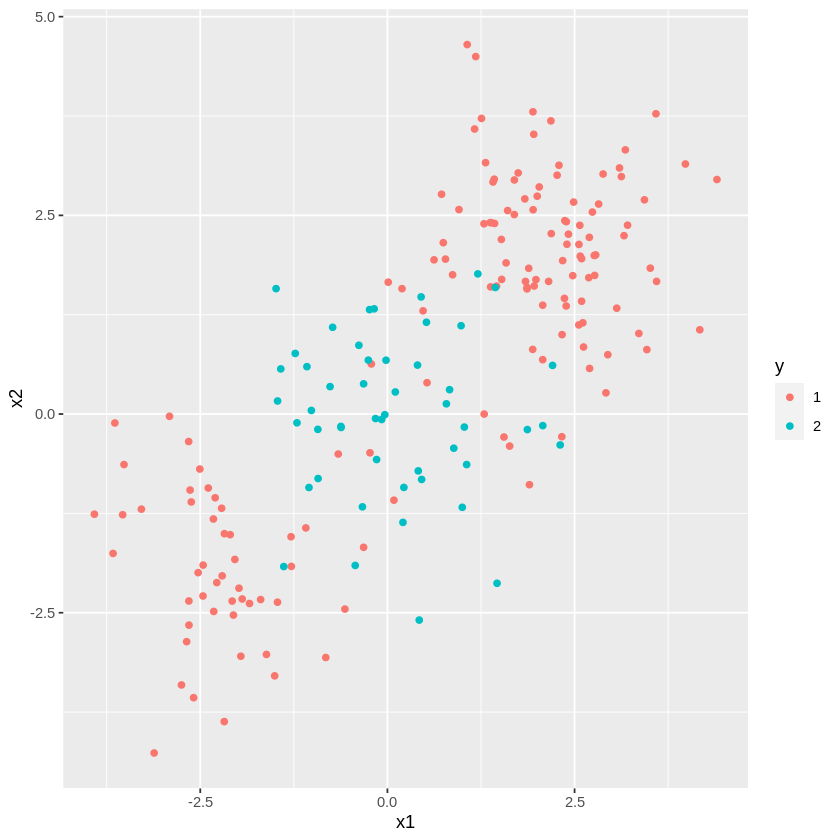

In [1]:
library(tidymodels)
library(ISLR2)

set.seed(1)
sim_data2 <- tibble(
  x1 = rnorm(200) + rep(c(2, -2, 0), c(100, 50, 50)),
  x2 = rnorm(200) + rep(c(2, -2, 0), c(100, 50, 50)),
  y  = factor(rep(c(1, 2), c(150, 50)))
)

sim_data2 %>%
  ggplot(aes(x1, x2, color = y)) +
  geom_point()

Now, you will try an SVM using a radial basis function (RBF). RBF should allow you to capture the non-linearity in the data. To create the specification, you should use `svm_rbf()`. Be sure to pass in classification as the mode and kernlab as the engine. Save your output to `svm_rbf_spec`. Do not set the scaled parameter to 'False'.

In [2]:
# Split the data into training and testing sets
# set.seed(123)

data_split <- initial_split(sim_data2, prop = 0.75)
train_data <- training(data_split)
test_data <- testing(data_split)

# Create the SVM specification with RBF kernel
svm_rbf_spec <- svm_rbf(mode = "classification") %>%
  set_engine("kernlab")



Now fit your model using `fit()` and store it in `svm_rbf_fit`.

In [3]:
svm_rbf_fit <- svm_rbf_spec %>%
  fit(y ~ ., data = train_data)


Plot your model and store it in `fit_plot`. What do you notice? 

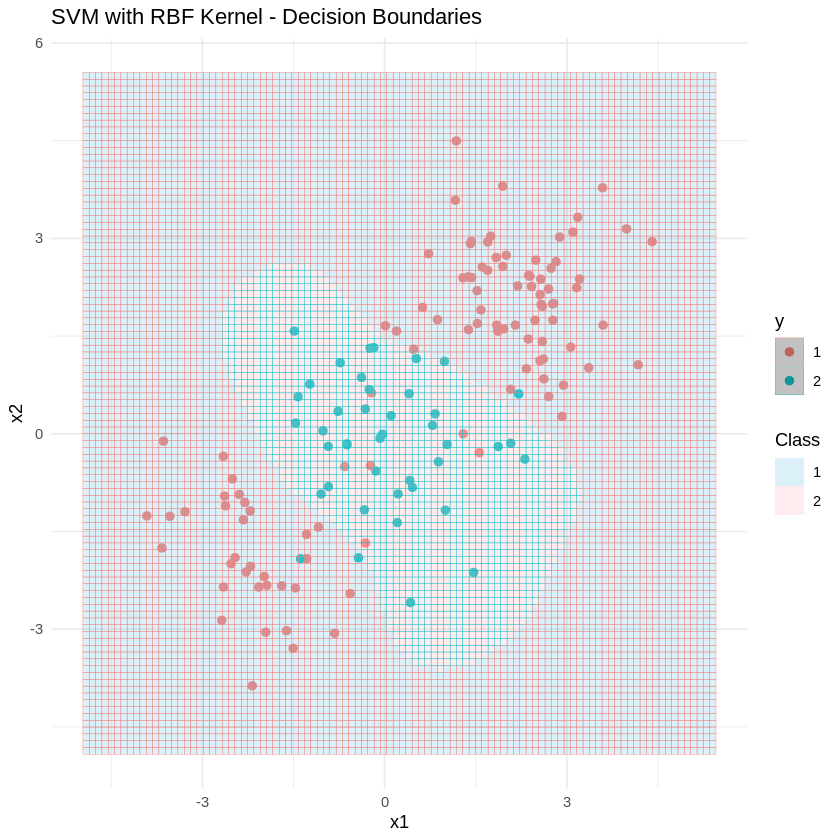

In [4]:
# Create a grid of values over the feature space
grid <- expand.grid(
  x1 = seq(min(train_data$x1) - 1, max(train_data$x1) + 1, length.out = 100),
  x2 = seq(min(train_data$x2) - 1, max(train_data$x2) + 1, length.out = 100)
)

# Use the fitted model to predict the class for each point in the grid
grid_pred <- predict(svm_rbf_fit, new_data = grid)

# Add the predictions to the grid data frame
grid$y <- grid_pred$.pred_class

# Plot the decision boundaries and the training data
fit_plot <- ggplot(train_data, aes(x1, x2, color = y)) +
  geom_point(size = 2) +
  geom_tile(data = grid, aes(fill = y), alpha = 0.3) +
  scale_fill_manual(values = c("skyblue", "pink")) +
  labs(title = "SVM with RBF Kernel - Decision Boundaries", fill = "Class") +
  theme_minimal()

# Print the plot
fit_plot




Attaching package: ‘kernlab’


The following object is masked from ‘package:purrr’:

    cross


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:scales’:

    alpha




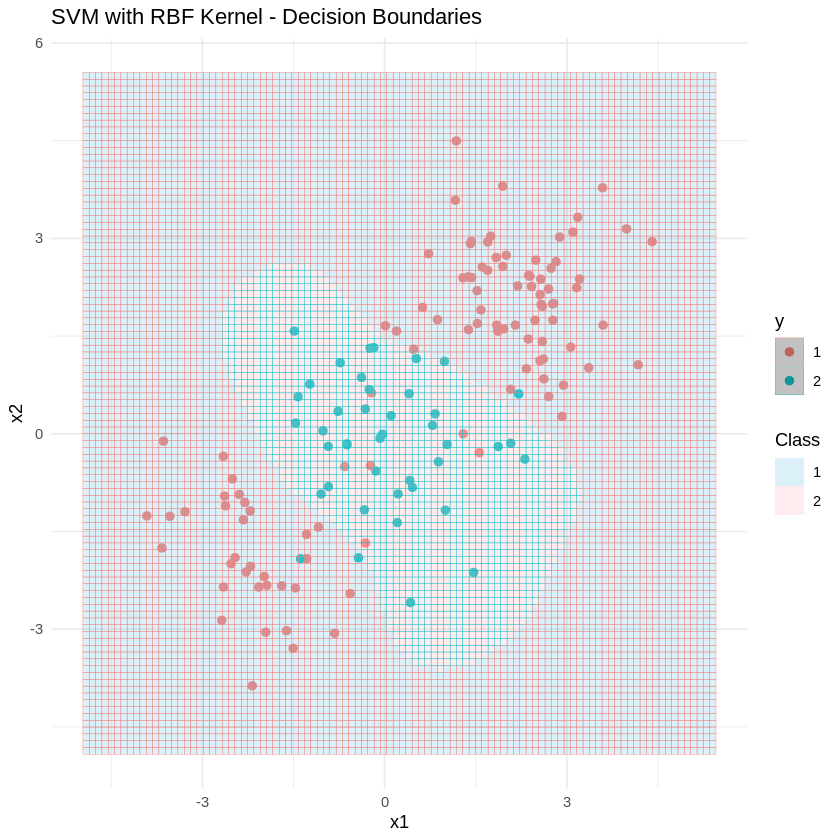

In [5]:
library(kernlab)

# YOUR CODE HERE

# Generate a sequence of values for x1 and x2 within the range of the training data
x1_seq <- seq(min(train_data$x1) - 1, max(train_data$x1) + 1, length.out = 100)
x2_seq <- seq(min(train_data$x2) - 1, max(train_data$x2) + 1, length.out = 100)

# Create a grid of values
grid <- expand.grid(x1 = x1_seq, x2 = x2_seq)

# Predict the class for each point in the grid using the fitted model
grid$y <- predict(svm_rbf_fit$fit, grid)

# Convert the predicted class to a factor with the same levels as the original response variable
grid$y <- factor(grid$y, levels = levels(train_data$y))

# Plot the decision boundaries along with the training data
fit_plot <- ggplot(train_data, aes(x1, x2, color = y)) +
  geom_point(size = 2) +
  geom_tile(data = grid, aes(fill = y), alpha = 0.3) +
  scale_fill_manual(values = c("skyblue", "pink")) +
  labs(title = "SVM with RBF Kernel - Decision Boundaries", fill = "Class") +
  theme_minimal()

# Print the plot
fit_plot




Now, let's see how well this model generalizes to new data from the sam generating process. 

In [6]:
set.seed(2)
sim_data2_test <- tibble(
  x1 = rnorm(200) + rep(c(2, -2, 0), c(100, 50, 50)),
  x2 = rnorm(200) + rep(c(2, -2, 0), c(100, 50, 50)),
  y  = factor(rep(c(1, 2), c(150, 50)))
)

In [7]:
augment(svm_rbf_fit, new_data = sim_data2_test) %>%
  conf_mat(truth = y, estimate = .pred_class)

          Truth
Prediction   1   2
         1 134   7
         2  16  43

What do you notice?